# ENTREGABLE 4

# INSTRUCCIONES

Utilizar el archivo CSV (`dataset_banco_clean.csv`) con 45189 filas y 17 columnas y aplicar las técnicas de normalización del entregable 3.

In [22]:
# imports
import numpy as np
import pandas as pd
import matplotlib .pyplot as plt

In [23]:
ruta = "dataset_banco_clean.csv"
data = pd.read_csv(ruta)
pd.options.mode.chained_assignment = None

In [24]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


# Objetivo

Generar un model de clasificación capaz de predecir la clase de flor en función de las carácterísticas del dataset

* Aplicar las técnicas oportunas de procesamiento de datos

* Generar split de los datos

* Valorar diferentes modelos de clasificación

* Comparación entre modelos

* Ensemble

* Métricas

* Conclusiones finales

## CREAMOS LAS PARTICIONES

In [25]:
x = data.drop(['y'], axis = 1)
y = data['y']

In [26]:
from sklearn.model_selection import train_test_split


'''Crear los sets de entrenamiento (70%), validación (15%)
    y prueba (15%)'''

x_train, x_test_val, y_train, y_test_val = train_test_split(x, y, test_size=0.3, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_test_val, y_test_val, test_size=0.5, random_state=42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_val.shape, y_val.shape)

(31632, 16) (31632,)
(6778, 16) (6778,)
(6779, 16) (6779,)


## NORMALIZACIÓN DE LAS PARTICIONES

In [27]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.preprocessing import LabelBinarizer

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical = ['marital', 'housing', 'loan', 'contact', 'job', 'month', 'poutcome', 'education']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric),
        ('cat', categorical_transformer, categorical)
    ])

label_binarizer = LabelBinarizer()
y_train_bin = label_binarizer.fit_transform(y_train)
y_val_bin = label_binarizer.transform(y_val)
y_test_bin = label_binarizer.transform(y_test)

x_train_s = preprocessor.fit_transform(x_train)
x_val_s = preprocessor.transform(x_val)
x_test_s = preprocessor.transform(x_test)

print("Valores mínimos y máximos de x_train_s:")
print(x_train_s.min(axis=0), x_train_s.max(axis=0))
print("\nValores mínimos y máximos de x_val_s:")
print(x_val_s.min(axis=0), x_val_s.max(axis=0))
print("\nValores mínimos y máximos de x_test_s:")
print(x_test_s.min(axis=0), x_test_s.max(axis=0))


Valores mínimos y máximos de x_train_s:
[-2.17488913 -2.2272257  -1.77949291 -1.01046087 -0.57420934 -0.41226409
 -0.30457273  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.        ] [  5.11950601 124.71889585   1.8261209   14.17629239  17.8661089
   8.30661788  26.60083011   1.           1.           1.
   1.           1.           1.           1.           1.
   1.           1.           1.           1.           1.
   1.           1.           1.           1.           1.
   1.           1.           1.           1.           1.
   1.           1.           1.           1.           1.
   1.

### DECISION TREE

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

x_val_dt = x_val_s[:-1]

decision_tree_model = DecisionTreeClassifier(random_state = 42)
decision_tree_model.fit(x_train_s, y_train_bin)

y_pred = decision_tree_model.predict(x_val_dt)

accuracy = accuracy_score(y_test_bin, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test_bin, y_pred))

conf_matrix = confusion_matrix(y_test_bin, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7890233107111242
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      5990
           1       0.10      0.11      0.11       788

    accuracy                           0.79      6778
   macro avg       0.49      0.49      0.49      6778
weighted avg       0.79      0.79      0.79      6778

Confusion Matrix:
[[5263  727]
 [ 703   85]]


### KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_s, y_train_bin)

y_pred = knn.predict(x_test_s)

accuracy = accuracy_score(y_test_bin, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test_bin, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test_bin, y_pred))

Accuracy: 0.8965771614045441
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      5990
           1       0.60      0.32      0.42       788

    accuracy                           0.90      6778
   macro avg       0.76      0.65      0.68      6778
weighted avg       0.88      0.90      0.88      6778

Confusion Matrix:
[[5822  168]
 [ 533  255]]


### RANDOM FOREST

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train_s, y_train_bin)

y_pred = rf_model.predict(x_val_s)

accuracy = accuracy_score(y_val_bin, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_val_bin, y_pred))

conf_matrix = confusion_matrix(y_val_bin, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.9066233957810886
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5981
           1       0.67      0.41      0.51       798

    accuracy                           0.91      6779
   macro avg       0.80      0.69      0.73      6779
weighted avg       0.89      0.91      0.90      6779

Confusion Matrix:
[[5818  163]
 [ 470  328]]


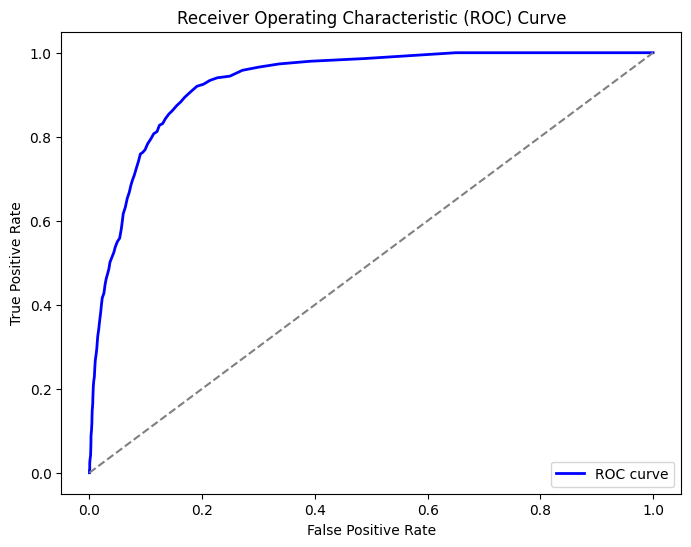

In [32]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

rf_model.fit(x_train_s, y_train_bin)


y_prob = rf_model.predict_proba(x_test_s)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_bin, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [33]:
from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(y_test_bin, y_prob)
print("AUC:", auc_score)


AUC: 0.928897782259773


In [34]:
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

rf_model = RandomForestClassifier(random_state=42)
scores = cross_val_score(rf_model, x_train_s, y_train_bin, cv=5)

print("Cross Validation Scores:", scores)

print("Mean Accuracy:", scores.mean())


Cross Validation Scores: [0.90121701 0.90137506 0.9032564  0.90357256 0.90531141]
Mean Accuracy: 0.9029464877627016


### XGBOOST

In [35]:
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(x_train_s, y_train_bin)

y_pred = xgb_model.predict(x_val_s)

accuracy = accuracy_score(y_val_bin, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_val_bin, y_pred))

conf_matrix = confusion_matrix(y_val_bin, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.9069184245463933
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      5981
           1       0.64      0.49      0.55       798

    accuracy                           0.91      6779
   macro avg       0.78      0.73      0.75      6779
weighted avg       0.90      0.91      0.90      6779

Confusion Matrix:
[[5756  225]
 [ 406  392]]


### SVM

In [36]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

svm_model = SVC(random_state=42)
svm_model.fit(x_train_s, y_train_bin)
y_pred = svm_model.predict(x_val_s)

accuracy = accuracy_score(y_val_bin, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_val_bin, y_pred))

conf_matrix = confusion_matrix(y_val_bin, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.9027880218321286
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5981
           1       0.68      0.33      0.45       798

    accuracy                           0.90      6779
   macro avg       0.80      0.66      0.70      6779
weighted avg       0.89      0.90      0.89      6779

Confusion Matrix:
[[5853  128]
 [ 531  267]]


### ISOLATION FOREST

In [37]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

isolation_forest_model = IsolationForest(random_state=42)
isolation_forest_model.fit(x_train_s)

y_pred_train = isolation_forest_model.predict(x_train_s)
y_pred_test = isolation_forest_model.predict(x_test_s)

print("Training Set:")
print("Confusion Matrix:")
print(confusion_matrix(y_train_bin, y_pred_train))
print("\nClassification Report:")
print(classification_report(y_train_bin, y_pred_train))

print("\nTest Set:")
print("Confusion Matrix:")
print(confusion_matrix(y_test_bin, y_pred_test))
print("\nClassification Report:")
print(classification_report(y_test_bin, y_pred_test))


Training Set:
Confusion Matrix:
[[    0     0     0]
 [ 1296     0 26637]
 [  528     0  3171]]

Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00     27933
           1       0.11      0.86      0.19      3699

    accuracy                           0.10     31632
   macro avg       0.04      0.29      0.06     31632
weighted avg       0.01      0.10      0.02     31632


Test Set:
Confusion Matrix:
[[   0    0    0]
 [ 243    0 5747]
 [ 124    0  664]]

Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00      5990
           1       0.10      0.84      0.18       788

    accuracy                           0.10      6778
   macro avg       0.03      0.28      0.06      6778
weighted avg       0.01      0.10      0.02      6778



### ENSAMBLE

In [38]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

svm_model = SVC(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)

ensemble_model = VotingClassifier(estimators=[('svm', svm_model), ('rf', rf_model), ('dt', dt_model)], voting='hard')
ensemble_model.fit(x_train_s, y_train_bin)

y_pred = ensemble_model.predict(x_test_s)

accuracy = accuracy_score(y_test_bin, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test_bin, y_pred))

conf_matrix = confusion_matrix(y_test_bin, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.9102980230156388
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5990
           1       0.72      0.38      0.49       788

    accuracy                           0.91      6778
   macro avg       0.82      0.68      0.72      6778
weighted avg       0.90      0.91      0.90      6778

Confusion Matrix:
[[5874  116]
 [ 492  296]]


### NAIVE BAYES

In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

nb_model = GaussianNB()

nb_model.fit(x_train_s, y_train_bin)

y_pred = nb_model.predict(x_test_s)

accuracy = accuracy_score(y_test_bin, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test_bin, y_pred))

conf_matrix = confusion_matrix(y_test_bin, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.8577751549129536
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      5990
           1       0.41      0.49      0.44       788

    accuracy                           0.86      6778
   macro avg       0.67      0.70      0.68      6778
weighted avg       0.87      0.86      0.86      6778

Confusion Matrix:
[[5428  562]
 [ 402  386]]


In [40]:
# GRID SEARCH

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

nb_model = GaussianNB()

params = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

grid_search = GridSearchCV(estimator=nb_model, param_grid=params, cv=5, scoring='accuracy')

grid_search.fit(x_train_s, y_train_bin)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test_s)

accuracy = accuracy_score(y_test_bin, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test_bin, y_pred))

conf_matrix = confusion_matrix(y_test_bin, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Best Parameters: {'var_smoothing': 1e-05}
Accuracy: 0.8577751549129536
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      5990
           1       0.41      0.49      0.44       788

    accuracy                           0.86      6778
   macro avg       0.67      0.70      0.68      6778
weighted avg       0.87      0.86      0.86      6778

Confusion Matrix:
[[5428  562]
 [ 402  386]]


# Conclusiones

Gracias al análisis de la clasificación realizado, hemos podido obtener las siguientes conclusiones:

1. Variedad de algoritmos: Existen numerosos algoritmos de clasificación en machine learning, cada uno con sus propias fortalezas y debilidades. Algunos de los algoritmos más comunes incluyen SVM, RF, k-NN, Xgboost, entre otros.
   
2. Tener en cuenta siempre el preprocesamiento de datos: El preprocesamiento de datos juega un papel crucial en la clasificación efectiva. Esto puede incluir la normalización de características, el manejo de valores faltantes, la codificación de variables categóricas y la selección de características relevantes. (A PESAR DE QUE NO ERA OBJETO EN ESTE NOTEBOOK NI EN ESTE DATASET)
   
3. Evaluación de modelos: Es importante evaluar correctamente el rendimiento de los modelos de clasificación. Esto se puede hacer utilizando métricas como precisión, exhaustividad, F1-score, área bajo la curva ROC (AUC-ROC), Confusion Matrix, entre otras. La elección de la métrica adecuada depende del contexto del problema y de las preferencias del usuario.

4. Tuning de hiperparámetros: Ajustar los hiperparámetros de los modelos es crucial para maximizar su rendimiento. Esto se puede hacer utilizando técnicas de búsqueda de hiperparámetros como la búsqueda en cuadrícula, la búsqueda aleatoria o la optimización bayesiana.
   
5. Interpretación de modelos: La interpretación de modelos de clasificación es importante para entender cómo toman decisiones y para ganar insights sobre los datos. Algunos modelos, como árboles de decisión y regresión logística, son más interpretables que otros, ya que, su entendimiento es mas sencillo

En resumen, la clasificación en machine learning es un campo amplio y fascinante que requiere una comprensión profunda de los algoritmos, técnicas de preprocesamiento de datos, evaluación de modelos y estrategias para abordar desafíos específicos del problema, en el que siempre escogeremos los que mejor se adapten a nuestros datos y mejores scores nos aporten.